# 水平速度数据分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import aquarel

theme = aquarel.load_theme('umbra_dark')
theme.apply()

In [2]:
fb1kv = pd.read_csv('GHFBPPK_vel.pos')

In [3]:
fb1tv = pd.read_csv('ghfb190901.pos', comment='%')

In [4]:
fb2kv = pd.read_csv('MDFBPPK_vel.pos')

In [5]:
fb2tv = pd.read_csv('mdfb190901.pos', comment='%')

In [6]:
fb1knv = fb1kv['vn(m/s)'].values

In [7]:
fb1tnv = fb1tv['   vn(m/s)'].values

In [8]:
fb1kev = fb1kv['ve(m/s)'].values

In [9]:
fb1tev = fb1tv['   ve(m/s)'].values

In [10]:
fb1kuv = fb1kv['vu(m/s)'].values

In [11]:
fb1tuv = fb1tv['   vu(m/s)'].values

In [12]:
fb2knv = fb2kv['vn(m/s)'].values

In [13]:
fb2tnv = fb2tv['   vn(m/s)'].values

In [14]:
fb2kev = fb2kv['ve(m/s)'].values

In [15]:
fb2tev = fb2tv['   ve(m/s)'].values

In [16]:
fb2kuv = fb2kv['vu(m/s)'].values

In [17]:
fb2tuv = fb2tv['   vu(m/s)'].values

In [18]:
len(fb1kv), len(fb2kv)

(128321, 94831)

In [19]:
t1 = np.arange(300)

## 信号处理

In [22]:
from ssh2swh import ssh2sse

In [23]:
smkev = fb1kev[37800:38100]
smknv = fb1knv[37800:38100]
smkuv = fb1kuv[37800:38100]

In [24]:
smtev = fb1tev[37800:38100]
smtnv = fb1tnv[37800:38100]
smtuv = fb1tuv[37800:38100]

In [25]:
smkes = np.cumsum(smkev)
smkns = np.cumsum(smknv)
smkus = np.cumsum(smkuv)

In [26]:
smtes = np.cumsum(smtev)
smtns = np.cumsum(smtnv)
smtus = np.cumsum(smtuv)

In [28]:
smkne = ssh2sse(smkns, 2, 120, 1)
smkee = ssh2sse(smkes, 2, 120, 1)
smkue = ssh2sse(smkus, 2, 120, 1)

In [29]:
smtne = ssh2sse(smtns, 2, 120, 1)
smtee = ssh2sse(smtes, 2, 120, 1)
smtue = ssh2sse(smtus, 2, 120, 1)

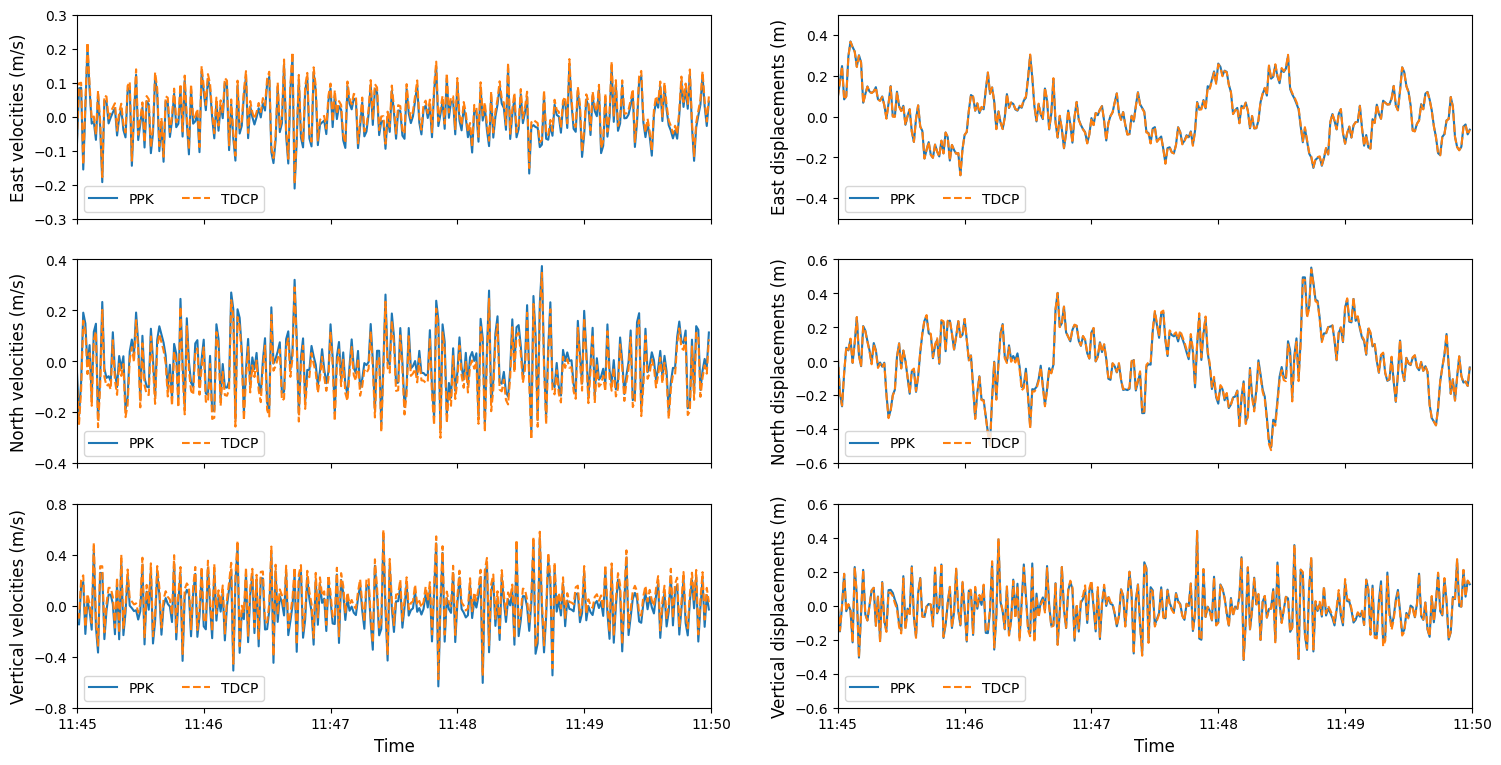

In [31]:
plt.figure(figsize=[18, 9])

plt.subplot(3, 2, 1)
plt.plot(t1, smkev, '-', label='PPK')
plt.plot(t1, smtev, '--', label='TDCP')
plt.xlim(0, 300)
plt.xticks(np.arange(0, 301, 60), labels=[])
plt.ylim(-0.3, 0.3)
plt.ylabel('East velocities (m/s)', fontsize=12)
plt.legend(loc='lower left', ncol=2)

ax4 = plt.subplot(3, 2, 2)
# ax4.yaxis.set_label_position("right")
# ax4.yaxis.tick_right()
plt.plot(t1, smkee, '-', label='PPK')
plt.plot(t1, smtee, '--', label='TDCP')
plt.xlim(0, 300)
plt.xticks(np.arange(0, 301, 60), labels=[])
plt.ylim(-0.5, 0.5)
plt.ylabel('East displacements (m)', fontsize=12)
plt.legend(loc='lower left', ncol=2)

plt.subplot(3, 2, 3)
plt.plot(t1, smknv, '-', label='PPK')
plt.plot(t1, smtnv, '--', label='TDCP')
plt.xlim(0, 300)
plt.xticks(np.arange(0, 301, 60), labels=[])
plt.ylim(-0.4, 0.4)
plt.ylabel('North velocities (m/s)', fontsize=12)
plt.legend(loc='lower left', ncol=2)

ax2 = plt.subplot(3, 2, 4)
# ax2.yaxis.set_label_position("right")
# ax2.yaxis.tick_right()
plt.plot(t1, smkne, '-', label='PPK')
plt.plot(t1, smtne, '--', label='TDCP')
plt.xlim(0, 300)
plt.xticks(np.arange(0, 301, 60), labels=[])
plt.ylim(-0.6, 0.6)
plt.ylabel('North displacements (m)', fontsize=12)
plt.legend(loc='lower left', ncol=2)

plt.subplot(3, 2, 5)
plt.plot(t1, smkuv, '-', label='PPK')
plt.plot(t1, smtuv, '--', label='TDCP')
plt.xlabel('Time', fontsize=12)
plt.xlim(0, 300)
plt.xticks(np.arange(0, 301, 60), labels=['11:45', '11:46', '11:47', '11:48', '11:49', '11:50'])
plt.ylim(-0.8, 0.8)
plt.ylabel('Vertical velocities (m/s)', fontsize=12)
plt.yticks(np.arange(-0.8, 0.81, 0.4))
plt.legend(loc='lower left', ncol=2)

ax6 = plt.subplot(3, 2, 6)
# ax6.yaxis.set_label_position("right")
# ax6.yaxis.tick_right()
plt.plot(t1, smkue, '-', label='PPK')
plt.plot(t1, smtue, '--', label='TDCP')
plt.xlabel('Time', fontsize=12)
plt.xlim(0, 300)
plt.xticks(np.arange(0, 301, 60), labels=['11:45', '11:46', '11:47', '11:48', '11:49', '11:50'])
plt.ylim(-0.6, 0.6)
plt.ylabel('Vertical displacements (m)', fontsize=12)
plt.legend(loc='lower left', ncol=2)

plt.savefig('../assets/fb1-ppk-tdcp-vel-neu-300s.pdf', format='pdf', bbox_inches='tight')
plt.show()

## 统计指标

### 速度

In [33]:
np.mean(fb1knv - fb1tnv), np.mean(fb1kev - fb1tev), np.mean(fb1kuv - fb1tuv)

(0.004475034809348094, 0.0010807215252152521, -0.038506900369003685)

In [34]:
np.std(fb1knv - fb1tnv), np.std(fb1kev - fb1tev), np.std(fb1kuv - fb1tuv)

(0.013574496883072853, 0.008035133444415298, 0.03138577130738656)

In [35]:
np.mean(fb2knv - fb2tnv), np.mean(fb2kev - fb2tev), np.mean(fb2kuv - fb2tuv)

(0.004537080094228503, 0.0003055101295641933, -0.03945556949352178)

In [36]:
np.std(fb2knv - fb2tnv), np.std(fb2kev - fb2tev), np.std(fb2kuv - fb2tuv)

(0.012993484573200868, 0.008444862140527355, 0.030881358931412112)

### 形变量

In [37]:
fb1kne = ssh2sse(np.cumsum(fb1knv), 2, 120, 1)
fb1kee = ssh2sse(np.cumsum(fb1kev), 2, 120, 1)
fb1kue = ssh2sse(np.cumsum(fb1kuv), 2, 120, 1)

In [38]:
fb1tne = ssh2sse(np.cumsum(fb1tnv), 2, 120, 1)
fb1tee = ssh2sse(np.cumsum(fb1tev), 2, 120, 1)
fb1tue = ssh2sse(np.cumsum(fb1tuv), 2, 120, 1)

In [39]:
fb2kne = ssh2sse(np.cumsum(fb2knv), 2, 120, 1)
fb2kee = ssh2sse(np.cumsum(fb2kev), 2, 120, 1)
fb2kue = ssh2sse(np.cumsum(fb2kuv), 2, 120, 1)

In [40]:
fb2tne = ssh2sse(np.cumsum(fb2tnv), 2, 120, 1)
fb2tee = ssh2sse(np.cumsum(fb2tev), 2, 120, 1)
fb2tue = ssh2sse(np.cumsum(fb2tuv), 2, 120, 1)

In [41]:
np.mean(fb1kne - fb1tne), np.mean(fb1kee - fb1tee), np.mean(fb1kue - fb1tue)

(2.1034254242451987e-05, -1.9759740357290457e-05, -9.742510072374018e-06)

In [42]:
np.std(fb1kne - fb1tne), np.std(fb1kee - fb1tee), np.std(fb1kue - fb1tue)

(0.011034650659009087, 0.0071760222515039164, 0.01936753075625121)

In [43]:
np.mean(fb2kne - fb2tne), np.mean(fb2kee - fb2tee), np.mean(fb2kue - fb2tue)

(-5.249397360889676e-06, -9.192197864152462e-07, 9.159974721461559e-06)

In [44]:
np.std(fb2kne - fb2tne), np.std(fb2kee - fb2tee), np.std(fb2kue - fb2tue)

(0.00908791685133994, 0.005929736814159674, 0.017488520917790292)